In [9]:
import torch
import torch.nn as nn

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/pamessina/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-8-5 torch 1.13.1+cu117 CUDA:0 (GeForce RTX 3090, 24267.0MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [6]:
imgs = ['https://ultralytics.com/images/zidane.jpg']

In [10]:
# Hack based on https://github.com/ultralytics/yolov5/issues/6948#issuecomment-1299936326
for m in model.modules():
    if isinstance(m, nn.Upsample):
        m.recompute_scale_factor = None

In [11]:
results = model(imgs)

/home/pamessina/venv2/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 28.6ms pre-process, 29.5ms inference, 10.4ms NMS per image at shape (1, 3, 384, 640)


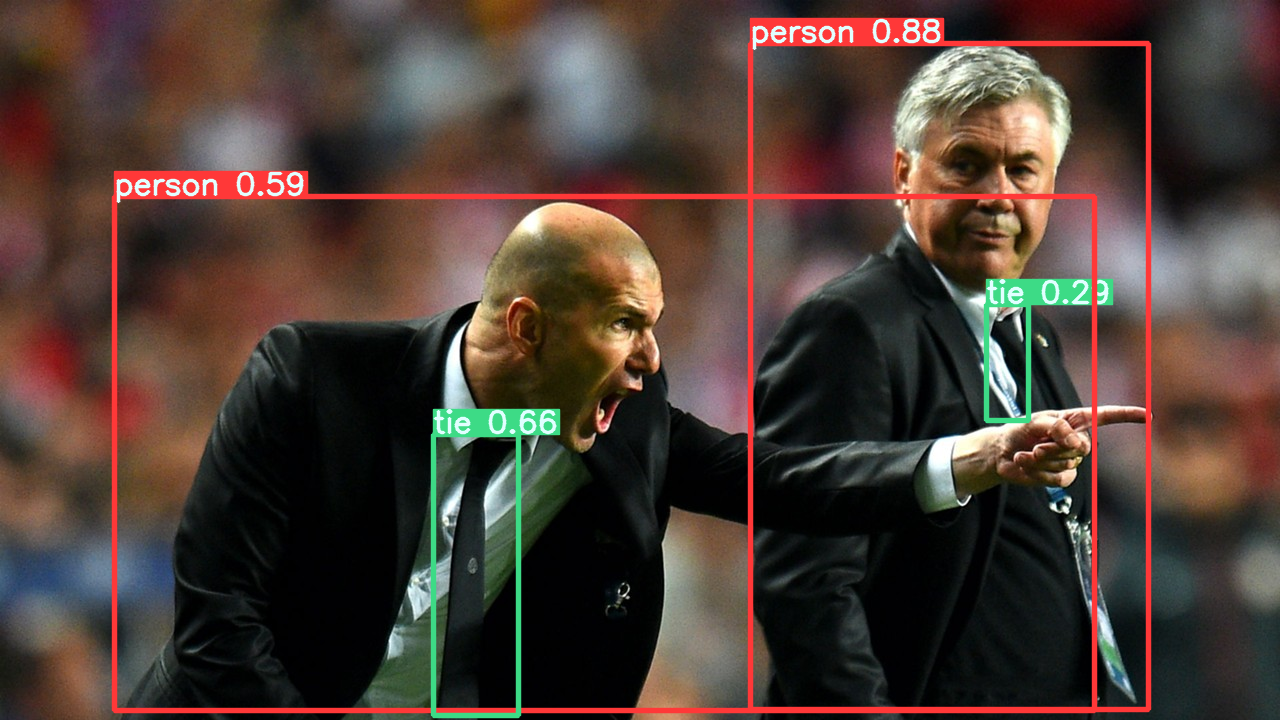

In [14]:
results.show()

In [21]:
from ultralytics import YOLO

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov5s.pt')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



  0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [18]:
# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)

Ultralytics YOLOv8.0.58 🚀 Python-3.10.10 torch-1.13.1+cu117 CUDA:0 (GeForce RTX 3090, 24267MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

  0%|          | 0.00/6.66M [00:00<?, ?B/s]

Unzipping /home/pamessina/medvqa/medvqa/models/notebooks/datasets/coco128.zip to /home/pamessina/medvqa/medvqa/models/notebooks/datasets...
Dataset download success ✅ (1.3s), saved to /home/pamessina/medvqa/medvqa/models/notebooks/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv         

                  skis        128          1       0.62          1      0.995      0.497
             snowboard        128          7      0.707      0.857      0.828       0.51
           sports ball        128          6      0.746      0.492      0.514      0.293
                  kite        128         10      0.529        0.4      0.558      0.236
          baseball bat        128          4      0.366      0.299      0.253      0.134
        baseball glove        128          7      0.579      0.429       0.43      0.302
            skateboard        128          5      0.756        0.6        0.6      0.447
         tennis racket        128          7      0.733        0.4      0.537      0.345
                bottle        128         18      0.454      0.444        0.4      0.248
            wine glass        128         16      0.599       0.56      0.649      0.369
                   cup        128         36      0.688      0.333      0.442      0.302
                  for

In [19]:
# Evaluate the model's performance on the validation set
results = model.val()

Ultralytics YOLOv8.0.58 🚀 Python-3.10.10 torch-1.13.1+cu117 CUDA:0 (GeForce RTX 3090, 24267MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /home/pamessina/medvqa/medvqa/models/notebooks/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67
                   all        128        929      0.658      0.593      0.644      0.482
                person        128        254      0.778      0.689      0.777      0.557
               bicycle        128          6      0.651      0.333      0.325      0.227
                   car        128         46       0.74      0.217      0.309      0.182
            motorcycle        128          5      0.698        0.8       0.92      0.732
              airplane        128          6      0.729      0.901      0.927      0.705
                   bus       

In [20]:
# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg')

  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/1 /home/pamessina/medvqa/medvqa/models/notebooks/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 16.1ms
Speed: 0.4ms preprocess, 16.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
model.model.forward

<bound method DetectionModel.forward of DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       

In [2]:
from ultralytics.nn.tasks import DetectionModel, attempt_load_one_weight
from ultralytics.yolo.utils import DEFAULT_CFG

In [4]:
# DEFAULT_CFG

In [3]:
# def get_model(self, cfg=None, weights=None, verbose=True):
#         model = DetectionModel(cfg, nc=self.data['nc'], verbose=verbose and RANK == -1)
#         if weights:
#             model.load(weights)
#         return model

# model, weights = 'yolov8l.pt', None
model, weights = '/home/pamessina/medvqa-workspace/cache/chest_imagenome/train4/weights/best.pt', None
ckpt = None
if str(model).endswith('.pt'):
    weights, ckpt = attempt_load_one_weight(model)
    cfg = ckpt['model'].yaml
else:
    cfg = model
model = DetectionModel(cfg, nc=36, verbose=True)
if weights:
    model.load(weights)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.Conv                  [512

In [4]:
import torch

In [149]:
# (batch_size, 3, img_size, img_size)

BATCH_SIZE = 4
IMG_SIZE = 416

input_tensor = torch.rand(BATCH_SIZE, 3, IMG_SIZE, IMG_SIZE)
input_tensor.shape
# model.forward()

torch.Size([4, 3, 416, 416])

In [150]:
output = model.forward(x=input_tensor)

In [151]:
for x in output:
    print(x.shape)

torch.Size([4, 100, 52, 52])
torch.Size([4, 100, 26, 26])
torch.Size([4, 100, 13, 13])


In [134]:
output[0]

tensor([[[[  0.8295,   1.2851,   1.0499,  ...,   0.8757,   0.6254,   0.6173],
          [  1.5745,   1.2580,   0.7951,  ...,   0.8660,   0.6188,   0.8361],
          [  1.1858,   1.0765,   1.4843,  ...,   0.5328,   0.7370,   0.8030],
          ...,
          [  0.9428,   0.5800,   0.6085,  ...,   1.1334,   0.8108,   0.7232],
          [  0.7601,   0.7559,   0.6782,  ...,   0.8697,   0.6782,   0.7583],
          [  0.9869,   0.7384,   0.7367,  ...,   0.5459,   0.6368,   0.5563]],

         [[  0.6252,   0.8127,   1.3669,  ...,   0.5815,   0.8455,   1.0194],
          [  0.6293,   0.8955,   1.3816,  ...,   0.7739,   0.5751,   1.1113],
          [  0.8367,   0.5789,   0.8314,  ...,   0.9470,   0.7568,   0.9944],
          ...,
          [  1.0135,   1.2241,   0.9711,  ...,   0.5982,   0.7550,   0.8820],
          [  1.0664,   1.2082,   1.1506,  ...,   1.4940,   0.8196,   1.2206],
          [  1.0225,   1.2280,   0.9723,  ...,   0.8889,   1.0697,   1.3434]],

         [[  0.8344,   0.7079,

In [ ]:
class YOLODataset(BaseDataset):
    cache_version = '1.0.2'  # dataset labels *.cache version, >= 1.0.0 for YOLOv8
    rand_interp_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4]
    """
    Dataset class for loading images object detection and/or segmentation labels in YOLO format.

    Args:
        img_path (str): path to the folder containing images.
        imgsz (int): image size (default: 640).
        cache (bool): if True, a cache file of the labels is created to speed up future creation of dataset instances
        (default: False).
        augment (bool): if True, data augmentation is applied (default: True).
        hyp (dict): hyperparameters to apply data augmentation (default: None).
        prefix (str): prefix to print in log messages (default: '').
        rect (bool): if True, rectangular training is used (default: False).
        batch_size (int): size of batches (default: None).
        stride (int): stride (default: 32).
        pad (float): padding (default: 0.0).
        single_cls (bool): if True, single class training is used (default: False).
        use_segments (bool): if True, segmentation masks are used as labels (default: False).
        use_keypoints (bool): if True, keypoints are used as labels (default: False).
        names (list): class names (default: None).

    Returns:
        A PyTorch dataset object that can be used for training an object detection or segmentation model.
    """

    def __init__(self,
                 img_path,
                 path_transform_fn,
                 imgsz=640,
                 cache=False,
                 augment=True,
                 hyp=None,
                 prefix='',
                 rect=False,
                 batch_size=None,
                 stride=32,
                 pad=0.0,
                 single_cls=False,
                 use_segments=False,
                 use_keypoints=False,
                 names=None,
                 classes=None):
        self.use_segments = use_segments
        self.use_keypoints = use_keypoints
        self.names = names
        self.path_transform_fn = path_transform_fn
        assert not (self.use_segments and self.use_keypoints), 'Can not use both segments and keypoints.'
        super().__init__(img_path, imgsz, cache, augment, hyp, prefix, rect, batch_size, stride, pad, single_cls,
                         classes)

    def cache_labels(self, path=Path('./labels.cache')):
        """Cache dataset labels, check images and read shapes.
        Args:
            path (Path): path where to save the cache file (default: Path('./labels.cache')).
        Returns:
            (dict): labels.
        """
        x = {'labels': []}
        nm, nf, ne, nc, msgs = 0, 0, 0, 0, []  # number missing, found, empty, corrupt, messages
        desc = f'{self.prefix}Scanning {path.parent / path.stem}...'
        total = len(self.im_files)
        with ThreadPool(NUM_THREADS) as pool:
            results = pool.imap(func=verify_image_label,
                                iterable=zip(self.im_files, self.label_files, repeat(self.prefix),
                                             repeat(self.use_keypoints), repeat(len(self.names))))
            pbar = tqdm(results, desc=desc, total=total, bar_format=TQDM_BAR_FORMAT)
            for im_file, lb, shape, segments, keypoint, nm_f, nf_f, ne_f, nc_f, msg in pbar:
                nm += nm_f
                nf += nf_f
                ne += ne_f
                nc += nc_f
                if im_file:
                    x['labels'].append(
                        dict(
                            im_file=im_file,
                            shape=shape,
                            cls=lb[:, 0:1],  # n, 1
                            bboxes=lb[:, 1:],  # n, 4
                            segments=segments,
                            keypoints=keypoint,
                            normalized=True,
                            bbox_format='xywh'))
                if msg:
                    msgs.append(msg)
                pbar.desc = f'{desc} {nf} images, {nm + ne} backgrounds, {nc} corrupt'
            pbar.close()

        if msgs:
            LOGGER.info('\n'.join(msgs))
        if nf == 0:
            LOGGER.warning(f'{self.prefix}WARNING ⚠️ No labels found in {path}. {HELP_URL}')
        x['hash'] = get_hash(self.label_files + self.im_files)
        x['results'] = nf, nm, ne, nc, len(self.im_files)
        x['msgs'] = msgs  # warnings
        x['version'] = self.cache_version  # cache version
        if is_dir_writeable(path.parent):
            if path.exists():
                path.unlink()  # remove *.cache file if exists
            np.save(str(path), x)  # save cache for next time
            path.with_suffix('.cache.npy').rename(path)  # remove .npy suffix
            LOGGER.info(f'{self.prefix}New cache created: {path}')
        else:
            LOGGER.warning(f'{self.prefix}WARNING ⚠️ Cache directory {path.parent} is not writeable, cache not saved.')
        return x

    def get_labels(self):
        self.label_files = img2label_paths(self.im_files, self.path_transform_fn)
        cache_path = Path(self.label_files[0]).parent.with_suffix('.cache')
        try:
            import gc
            gc.disable()  # reduce pickle load time https://github.com/ultralytics/ultralytics/pull/1585
            cache, exists = np.load(str(cache_path), allow_pickle=True).item(), True  # load dict
            gc.enable()
            assert cache['version'] == self.cache_version  # matches current version
            assert cache['hash'] == get_hash(self.label_files + self.im_files)  # identical hash
        except (FileNotFoundError, AssertionError, AttributeError):
            cache, exists = self.cache_labels(cache_path), False  # run cache ops

        # Display cache
        nf, nm, ne, nc, n = cache.pop('results')  # found, missing, empty, corrupt, total
        if exists and LOCAL_RANK in (-1, 0):
            d = f'Scanning {cache_path}... {nf} images, {nm + ne} backgrounds, {nc} corrupt'
            tqdm(None, desc=self.prefix + d, total=n, initial=n, bar_format=TQDM_BAR_FORMAT)  # display cache results
            if cache['msgs']:
                LOGGER.info('\n'.join(cache['msgs']))  # display warnings
        if nf == 0:  # number of labels found
            raise FileNotFoundError(f'{self.prefix}No labels found in {cache_path}, can not start training. {HELP_URL}')

        # Read cache
        [cache.pop(k) for k in ('hash', 'version', 'msgs')]  # remove items
        labels = cache['labels']
        self.im_files = [lb['im_file'] for lb in labels]  # update im_files

        # Check if the dataset is all boxes or all segments
        lengths = ((len(lb['cls']), len(lb['bboxes']), len(lb['segments'])) for lb in labels)
        len_cls, len_boxes, len_segments = (sum(x) for x in zip(*lengths))
        if len_segments and len_boxes != len_segments:
            LOGGER.warning(
                f'WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = {len_segments}, '
                f'len(boxes) = {len_boxes}. To resolve this only boxes will be used and all segments will be removed. '
                'To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.')
            for lb in labels:
                lb['segments'] = []
        if len_cls == 0:
            raise ValueError(f'All labels empty in {cache_path}, can not start training without labels. {HELP_URL}')
        return labels

    # TODO: use hyp config to set all these augmentations
    def build_transforms(self, hyp=None):
        if self.augment:
            hyp.mosaic = hyp.mosaic if self.augment and not self.rect else 0.0
            hyp.mixup = hyp.mixup if self.augment and not self.rect else 0.0
            transforms = v8_transforms(self, self.imgsz, hyp)
        else:
            transforms = Compose([LetterBox(new_shape=(self.imgsz, self.imgsz), scaleup=False)])
        transforms.append(
            Format(bbox_format='xywh',
                   normalize=True,
                   return_mask=self.use_segments,
                   return_keypoint=self.use_keypoints,
                   batch_idx=True,
                   mask_ratio=hyp.mask_ratio,
                   mask_overlap=hyp.overlap_mask))
        return transforms

    def close_mosaic(self, hyp):
        hyp.mosaic = 0.0  # set mosaic ratio=0.0
        hyp.copy_paste = 0.0  # keep the same behavior as previous v8 close-mosaic
        hyp.mixup = 0.0  # keep the same behavior as previous v8 close-mosaic
        self.transforms = self.build_transforms(hyp)

    def update_labels_info(self, label):
        """custom your label format here"""
        # NOTE: cls is not with bboxes now, classification and semantic segmentation need an independent cls label
        # we can make it also support classification and semantic segmentation by add or remove some dict keys there.
        bboxes = label.pop('bboxes')
        segments = label.pop('segments')
        keypoints = label.pop('keypoints', None)
        bbox_format = label.pop('bbox_format')
        normalized = label.pop('normalized')
        label['instances'] = Instances(bboxes, segments, keypoints, bbox_format=bbox_format, normalized=normalized)
        return label

    @staticmethod
    def collate_fn(batch):
        new_batch = {}
        keys = batch[0].keys()
        values = list(zip(*[list(b.values()) for b in batch]))
        for i, k in enumerate(keys):
            value = values[i]
            if k == 'img':
                value = torch.stack(value, 0)
            if k in ['masks', 'keypoints', 'bboxes', 'cls']:
                value = torch.cat(value, 0)
            new_batch[k] = value
        new_batch['batch_idx'] = list(new_batch['batch_idx'])
        for i in range(len(new_batch['batch_idx'])):
            new_batch['batch_idx'][i] += i  # add target image index for build_targets()
        new_batch['batch_idx'] = torch.cat(new_batch['batch_idx'], 0)
        return new_batch

In [ ]:
def check_det_dataset(dataset, autodownload=True):
    # Download, check and/or unzip dataset if not found locally
    data = check_file(dataset)

    # Download (optional)
    extract_dir = ''
    if isinstance(data, (str, Path)) and (is_zipfile(data) or is_tarfile(data)):
        new_dir = safe_download(data, dir=DATASETS_DIR, unzip=True, delete=False, curl=False)
        data = next((DATASETS_DIR / new_dir).rglob('*.yaml'))
        extract_dir, autodownload = data.parent, False

    # Read yaml (optional)
    if isinstance(data, (str, Path)):
        data = yaml_load(data, append_filename=True)  # dictionary

    # Checks
    for k in 'train', 'val':
        if k not in data:
            raise SyntaxError(
                emojis(f"{dataset} '{k}:' key missing ❌.\n'train' and 'val' are required in all data YAMLs."))
    if 'names' not in data and 'nc' not in data:
        raise SyntaxError(emojis(f"{dataset} key missing ❌.\n either 'names' or 'nc' are required in all data YAMLs."))
    if 'names' in data and 'nc' in data and len(data['names']) != data['nc']:
        raise SyntaxError(emojis(f"{dataset} 'names' length {len(data['names'])} and 'nc: {data['nc']}' must match."))
    if 'names' not in data:
        data['names'] = [f'class_{i}' for i in range(data['nc'])]
    else:
        data['nc'] = len(data['names'])

    data['names'] = check_class_names(data['names'])

    # Resolve paths
    path = Path(extract_dir or data.get('path') or Path(data.get('yaml_file', '')).parent)  # dataset root

    if not path.is_absolute():
        path = (DATASETS_DIR / path).resolve()
        data['path'] = path  # download scripts
    for k in 'train', 'val', 'test':
        if data.get(k):  # prepend path
            if isinstance(data[k], str):
                x = (path / data[k]).resolve()
                if not x.exists() and data[k].startswith('../'):
                    x = (path / data[k][3:]).resolve()
                data[k] = str(x)
            else:
                data[k] = [str((path / x).resolve()) for x in data[k]]

    # Parse yaml
    train, val, test, s = (data.get(x) for x in ('train', 'val', 'test', 'download'))
    if val:
        val = [Path(x).resolve() for x in (val if isinstance(val, list) else [val])]  # val path
        if not all(x.exists() for x in val):
            m = f"\nDataset '{dataset}' images not found ⚠️, missing paths %s" % [str(x) for x in val if not x.exists()]
            if s and autodownload:
                LOGGER.warning(m)
            else:
                raise FileNotFoundError(m)
            t = time.time()
            if s.startswith('http') and s.endswith('.zip'):  # URL
                safe_download(url=s, dir=DATASETS_DIR, delete=True)
                r = None  # success
            elif s.startswith('bash '):  # bash script
                LOGGER.info(f'Running {s} ...')
                r = os.system(s)
            else:  # python script
                r = exec(s, {'yaml': data})  # return None
            dt = f'({round(time.time() - t, 1)}s)'
            s = f"success ✅ {dt}, saved to {colorstr('bold', DATASETS_DIR)}" if r in (0, None) else f'failure {dt} ❌'
            LOGGER.info(f'Dataset download {s}\n')
    check_font('Arial.ttf' if is_ascii(data['names']) else 'Arial.Unicode.ttf')  # download fonts

    return data  # dictionary

In [ ]:
self.args = get_cfg(cfg, overrides)

In [ ]:
try:
            if self.args.task == 'classify':
                self.data = check_cls_dataset(self.args.data)
            elif self.args.data.endswith('.yaml') or self.args.task in ('detect', 'segment'):
                self.data = check_det_dataset(self.args.data)
                if 'yaml_file' in self.data:
                    self.args.data = self.data['yaml_file']  # for validating 'yolo train data=url.zip' usage
        except Exception as e:
            raise RuntimeError(emojis(f"Dataset '{self.args.data}' error ❌ {e}")) from e

In [ ]:
def get_dataset(data):
        """
        Get train, val path from data dict if it exists. Returns None if data format is not recognized.
        """
        return data['train'], data.get('val') or data.get('test')


In [ ]:
self.trainset, self.testset = self.get_dataset(self.data)

In [ ]:
build_dataloader(cfg, path_transform_fn, batch, img_path, stride=32, rect=False, names=None, rank=-1, mode='train'):
    assert mode in ['train', 'val']
    shuffle = mode == 'train'
    if cfg.rect and shuffle:
        LOGGER.warning("WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False")
        shuffle = False
    with torch_distributed_zero_first(rank):  # init dataset *.cache only once if DDP
        dataset = YOLODataset(
            img_path=img_path,
            path_transform_fn=path_transform_fn,
            imgsz=cfg.imgsz,
            batch_size=batch,
            augment=mode == 'train',  # augmentation
            hyp=cfg,  # TODO: probably add a get_hyps_from_cfg function
            rect=cfg.rect or rect,  # rectangular batches
            cache=cfg.cache or None,
            single_cls=cfg.single_cls or False,
            stride=int(stride),
            pad=0.0 if mode == 'train' else 0.5,
            prefix=colorstr(f'{mode}: '),
            use_segments=cfg.task == 'segment',
            use_keypoints=cfg.task == 'keypoint',
            names=names,
            classes=cfg.classes)

    batch = min(batch, len(dataset))
    nd = torch.cuda.device_count()  # number of CUDA devices
    workers = cfg.workers if mode == 'train' else cfg.workers * 2
    nw = min([os.cpu_count() // max(nd, 1), batch if batch > 1 else 0, workers])  # number of workers
    sampler = None if rank == -1 else distributed.DistributedSampler(dataset, shuffle=shuffle)
    loader = DataLoader if cfg.image_weights or cfg.close_mosaic else InfiniteDataLoader  # allow attribute updates
    generator = torch.Generator()
    generator.manual_seed(6148914691236517205 + RANK)
    return loader(dataset=dataset,
                  batch_size=batch,
                  shuffle=shuffle and sampler is None,
                  num_workers=nw,
                  sampler=sampler,
                  pin_memory=PIN_MEMORY,
                  collate_fn=getattr(dataset, 'collate_fn', None),
                  worker_init_fn=seed_worker,
                  generator=generator), dataset

In [ ]:
def get_dataloader(self, dataset_path, batch_size, mode='train', rank=0):
        # TODO: manage splits differently
        # calculate stride - check if model is initialized
        gs = max(int(de_parallel(self.model).stride.max() if self.model else 0), 32)
        # print(f'**** DEBUG (ultralytics/yolo/v8/train.py): self.args = {self.args}')
        return create_dataloader(path=dataset_path,
                                 imgsz=self.args.imgsz,
                                 batch_size=batch_size,
                                 stride=gs,
                                 hyp=vars(self.args),
                                 augment=mode == 'train',
                                 cache=self.args.cache,
                                 pad=0 if mode == 'train' else 0.5,
                                 rect=self.args.rect or mode == 'val',
                                 rank=rank,
                                 workers=self.args.workers,
                                 close_mosaic=self.args.close_mosaic != 0,
                                 prefix=colorstr(f'{mode}: '),
                                 shuffle=mode == 'train',
                                 seed=self.args.seed)[0] if self.args.v5loader else \
            build_dataloader(self.args, self._path_transform_fn, batch_size, img_path=dataset_path, stride=gs, rank=rank, mode=mode,
                             rect=mode == 'val', names=self.data['names'])[0]

In [ ]:
self.train_loader = self.get_dataloader(self.trainset, batch_size=batch_size, rank=RANK, mode='train')

In [ ]:
def preprocess_batch(self, batch):
        batch['img'] = batch['img'].to(self.device, non_blocking=True).float() / 255
        return batch

In [ ]:
# Forward
with torch.cuda.amp.autocast(self.amp):
    batch = self.preprocess_batch(batch)
    preds = self.model(batch['img'])
    self.loss, self.loss_items = self.criterion(preds, batch)
    if RANK != -1:
        self.loss *= world_size
    self.tloss = (self.tloss * i + self.loss_items) / (i + 1) if self.tloss is not None \
        else self.loss_items

In [21]:
from ultralytics.yolo.v8.detect.train import Loss

In [ ]:
def criterion(self, preds, batch):
        if not hasattr(self, 'compute_loss'):
            self.compute_loss = Loss(de_parallel(self.model))
        return self.compute_loss(preds, batch)

In [5]:
from ultralytics.yolo.cfg import get_cfg
from ultralytics.yolo.data.utils import check_det_dataset

In [6]:
args = get_cfg(overrides={
    'data': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/config(decent_images_only).yaml',
    'model': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/train4/weights/best.pt',
})

In [7]:
args

namespace(task='detect',
          mode='train',
          model='/home/pamessina/medvqa-workspace/cache/chest_imagenome/train4/weights/best.pt',
          data='/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/config(decent_images_only).yaml',
          epochs=100,
          patience=50,
          batch=16,
          imgsz=640,
          save=True,
          save_period=-1,
          cache=False,
          device=None,
          workers=8,
          project=None,
          name=None,
          exist_ok=False,
          pretrained=False,
          optimizer='SGD',
          verbose=True,
          seed=0,
          deterministic=True,
          single_cls=False,
          image_weights=False,
          rect=False,
          cos_lr=False,
          close_mosaic=10,
          resume=False,
          amp=True,
          overlap_mask=True,
          mask_ratio=4,
          dropout=0.0,
          val=True,
          split='val',
          save_json=False,
          save_hybrid=

In [8]:
data = check_det_dataset(args.data)

In [9]:
data

{'path': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5',
 'train': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/train(decent_images_only).txt',
 'val': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/val(decent_images_only).txt',
 'test': '/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/test(decent_images_only).txt',
 'source_pattern': '/mnt/workspace/mimic-cxr-jpg/images-medium(512)',
 'target_pattern': '/mnt/workspace/mimic-cxr-jpg/chest_imagenome_yolov5_labels',
 'nc': 36,
 'names': {0: 'right lung',
  1: 'right upper lung zone',
  2: 'right mid lung zone',
  3: 'right lower lung zone',
  4: 'right hilar structures',
  5: 'right apical zone',
  6: 'right costophrenic angle',
  7: 'right cardiophrenic angle',
  8: 'right hemidiaphragm',
  9: 'left lung',
  10: 'left upper lung zone',
  11: 'left mid lung zone',
  12: 'left lower lung zone',
  13: 'left hilar structures',
  14: 'left apical zone',
  1

In [10]:
trainset  = data['train']

In [11]:
trainset

'/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/train(decent_images_only).txt'

In [12]:
from ultralytics.yolo.data.build import build_dataloader

In [13]:
from ultralytics.yolo.utils.torch_utils import de_parallel

In [14]:
gs = max(int(de_parallel(model).stride.max()), 32)

In [59]:
args.imgsz=416

In [60]:
_sp = data['source_pattern']
_tp = data['target_pattern']
print('source_pattern = ', _sp)
print('target_pattern = ', _tp)
_path_transform_fn = lambda x : x.replace(_sp, _tp).rsplit('.', 1)[0] + '.txt'

dataloader, dataset = build_dataloader(args, _path_transform_fn, batch=5, img_path=trainset, stride=gs, mode='train',
                             rect=False, names=data['names'])

source_pattern =  /mnt/workspace/mimic-cxr-jpg/images-medium(512)
target_pattern =  /mnt/workspace/mimic-cxr-jpg/chest_imagenome_yolov5_labels


train: Scanning /mnt/workspace/mimic-cxr-jpg/chest_imagenome_yolov5_labels/p10/p10000032/s50414267.cache... 234217 images, 0 backg
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


In [61]:
batch = next(iter(dataloader))

In [62]:
batch.keys()

dict_keys(['im_file', 'ori_shape', 'resized_shape', 'img', 'cls', 'bboxes', 'batch_idx'])

In [64]:
import torch
device = torch.device('cuda')

In [65]:
def preprocess_batch(batch, device):
    batch['img'] = batch['img'].to(device, non_blocking=True).float() / 255
    return batch

In [21]:
model = model.to(device)

In [66]:
batch = preprocess_batch(batch, device)

In [67]:
batch.keys()

dict_keys(['im_file', 'ori_shape', 'resized_shape', 'img', 'cls', 'bboxes', 'batch_idx'])

In [68]:
batch['img'].shape

torch.Size([5, 3, 416, 416])

In [81]:
model.eval()

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
    

In [82]:
preds = model(batch['img'])

In [90]:
preds[0].shape

torch.Size([5, 40, 3549])

In [71]:
preds[0].shape

torch.Size([5, 100, 52, 52])

In [113]:
from ultralytics.yolo.utils.ops import non_max_suppression

postprocessed_preds = non_max_suppression(preds[0], conf_thres=0.1, iou_thres=0.6, max_det=36)

In [122]:
postprocessed_preds[0]

tensor([[ 2.9937e+02,  1.6996e+02,  4.1597e+02,  4.1664e+02,  9.4578e-01,  0.0000e+00],
        [ 1.0857e+02, -1.5871e-01,  4.1589e+02,  9.6160e+01,  9.3640e-01,  3.4000e+01],
        [ 7.3495e+01,  1.7090e+02,  2.6447e+02,  4.1578e+02,  9.1726e-01,  9.0000e+00],
        [ 2.9974e+02,  1.7993e+02,  4.1605e+02,  3.0939e+02,  9.1533e-01,  1.0000e+00],
        [ 1.1389e+02,  1.8094e+02,  2.6512e+02,  3.0916e+02,  9.1033e-01,  1.0000e+01],
        [ 6.3896e+01,  1.4378e+02,  2.5678e+02,  2.4101e+02,  9.0953e-01,  2.0000e+01],
        [ 1.4554e+02,  2.1675e+02,  3.3161e+02,  4.1605e+02,  8.9569e-01,  2.2000e+01],
        [ 2.9937e+02,  1.6996e+02,  4.1642e+02,  2.4155e+02,  8.8123e-01,  5.0000e+00],
        [ 3.0361e+02,  1.4633e+02,  4.1596e+02,  2.3734e+02,  8.8106e-01,  1.9000e+01],
        [ 1.0929e+02,  3.3813e-02,  2.8549e+02,  9.5831e+01,  8.5545e-01,  3.2000e+01],
        [ 2.8625e+02,  1.2506e-01,  4.1606e+02,  9.6220e+01,  8.5402e-01,  3.3000e+01],
        [ 1.3107e+02,  1.7075e+0

In [5]:
import torch
torch.tensor(5.0).int().item()

5

In [1]:
postprocessed_preds[0][2, -1]

NameError: name 'postprocessed_preds' is not defined

In [113]:
preds[0].shape

torch.Size([40, 100, 80, 80])

In [117]:
def set_model_attributes(model, data, args):
    model.nc = data['nc']  # attach number of classes to model
    model.names = data['names']  # attach class names to model
    model.args = args  # attach hyperparameters to model

In [125]:
set_model_attributes(model, data, args)

In [126]:
from ultralytics.yolo.v8.detect.train import Loss

criterion = Loss(de_parallel(model))

In [127]:
loss, loss_items = criterion(preds, batch)

In [130]:
loss

tensor(516.4689, device='cuda:0', grad_fn=<MulBackward0>)

In [129]:
loss_items

tensor([3.5350, 5.1944, 4.1824], device='cuda:0')

In [1]:
from medvqa.models.model_debugging_utils import visualize_chest_imagenome_yolov8_predictions

In [2]:
%matplotlib inline

In [3]:
output = visualize_chest_imagenome_yolov8_predictions(
    model_name_or_path='/home/pamessina/medvqa-workspace/cache/chest_imagenome/train4/weights/best.pt',
    dicom_id='0f3ae264-fd754868-59eb9923-51b5b75b-2cf3c160',
    image_size=(416, 416),
    conf_thres=0.1,
    iou_thres=0.1,
)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.Conv                  [512


--------------------------
0 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 3, 256, 256])
1 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 64, 128, 128])
2 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 128, 64, 64])
3 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 128, 64, 64])
4 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 256, 32, 32])
5 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 256, 32, 32])
6 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 512, 16, 16])
7 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 512, 16, 16])
8 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 512, 8, 8])
9 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 512, 8, 8])
10 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = to

Transferred 595/595 items from pretrained weights


dicom_id = 0f3ae264-fd754868-59eb9923-51b5b75b-2cf3c160
image_path = /mnt/workspace/mimic-cxr-jpg/images-medium(512)/p15/p15471281/s51085300/0f3ae264-fd754868-59eb9923-51b5b75b-2cf3c160.jpg
get_image_transform()
  Using bounding box aware transforms
    Returning default transform (no augmentation)
image.shape = torch.Size([3, 416, 416])
image_size_before = (512, 615)
image_size_after = (416, 416)

--------------------------
0 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 3, 416, 416])
1 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 64, 208, 208])
2 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 128, 104, 104])
3 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 128, 104, 104])
4 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 256, 52, 52])
5 (_forward_once) type(x) = <class 'torch.Tensor'>, x.shape = torch.Size([1, 256, 52, 52])
6 (_forward_once) ty

In [3]:
output

{'dicom_id': '1b77c96e-849aa099-ab865966-6d4ac61d-92cb2a32',
 'pred_coords': array([[   0.018379,    0.077015,     0.14363,     0.14855],
        [   0.014438,    0.087538,    0.072812,      0.1484]], dtype=float32),
 'pred_classes': array([34, 32])}

Predicted bounding boxes are in blue
Ground truth bounding boxes are in red


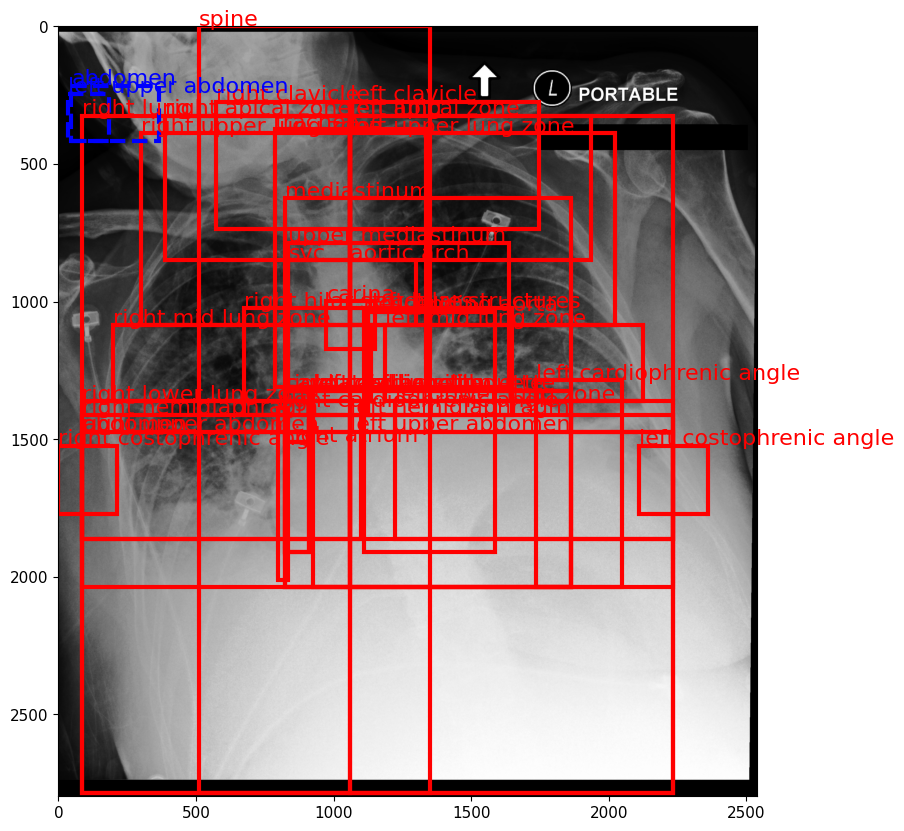

DEBUG: After plt.show()


In [11]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import _visualize_predicted_bounding_boxes__yolo    
_visualize_predicted_bounding_boxes__yolo(
    dicom_id=output['dicom_id'],
    pred_coords=output['pred_coords'],
    pred_classes=output['pred_classes'],
    figsize=(10,10),
    format='xyxy',
)

In [3]:
from IPython.display import Image

In [5]:
# Image('/mnt/data/mimic-cxr-jpg/images/p16/p16202057/s51967138/1b77c96e-849aa099-ab865966-6d4ac61d-92cb2a32.jpg')